In [28]:
pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/06/15/e73734f9170b66c6a84a0bd7e03586e87e77404e2eb8e34749fc49fa43f7/scipy-1.11.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     -------------------------- ----------- 41.0/59.1 kB 388.9 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 444.2 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.

In [1]:
# importing libs
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Input, Dense, GaussianNoise,Lambda,Dropout
from keras.models import Model
from keras import regularizers
from keras.layers import BatchNormalization
from keras.optimizers import Adam,SGD
from keras import backend as K

In [4]:
# for reproducing result
from numpy.random import seed
seed(1)
# from tensorflow import set_random_seed
tf.random.set_seed(3)

NameError: name 'tf' is not defined

In [7]:
# defining parameters
# define (n,k) here for (n,k) autoencoder
# n = n_channel 
# k = log2(M)  ==> so for (7,4) autoencoder n_channel = 7 and M = 2^4 = 16 
M = 4
k = np.log2(M)
k = int(k)
n_channel = 2
R = k/n_channel
print ('M:',M,'k:',k,'n:',n_channel)

M: 4 k: 2 n: 2


In [8]:
#generating data of size N
N = 8000
label = np.random.randint(M,size=N)

In [9]:
# creating one hot encoded vectors
data = []
for i in label:
    temp = np.zeros(M)
    temp[i] = 1
    data.append(temp)

In [10]:
# checking data shape
data = np.array(data)
print (data.shape)

(8000, 4)


In [11]:
# checking generated data with it's label
temp_check = [17,23,45,67,89,96,72,250,350]
for i in temp_check:
    print(label[i],data[i])

1 [0. 1. 0. 0.]
0 [1. 0. 0. 0.]
1 [0. 1. 0. 0.]
3 [0. 0. 0. 1.]
1 [0. 1. 0. 0.]
3 [0. 0. 0. 1.]
0 [1. 0. 0. 0.]
3 [0. 0. 0. 1.]
0 [1. 0. 0. 0.]


In [12]:
# defining autoencoder and it's layer
input_signal = Input(shape=(M,))
encoded = Dense(M, activation='relu')(input_signal)
encoded1 = Dense(n_channel, activation='linear')(encoded)
encoded2 = Lambda(lambda x: np.sqrt(n_channel)*K.l2_normalize(x,axis=1))(encoded1)

EbNo_train = 5.01187 #  coverted 7 db of EbNo
encoded3 = GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded2)

decoded = Dense(M, activation='relu')(encoded3)
decoded1 = Dense(M, activation='softmax')(decoded)
autoencoder = Model(input_signal, decoded1)
adam = Adam(lr=0.01)
autoencoder.compile(optimizer=adam, loss='categorical_crossentropy')

In [13]:
# printing summary of layers and it's trainable parameters 
print (autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 lambda (Lambda)             (None, 2)                 0         
                                                                 
 gaussian_noise (GaussianNo  (None, 2)                 0         
 ise)                                                            
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                             

In [17]:
# for tensor board visualization
# tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

In [19]:
# traning auto encoder
autoencoder.fit(data, data,
                epochs=45,
                batch_size=32)

Epoch 1/45
250/250 [==============================] - 3s 4ms/step - loss: 1.2469
Epoch 2/45
250/250 [==============================] - 1s 4ms/step - loss: 0.8100
Epoch 3/45
250/250 [==============================] - 1s 5ms/step - loss: 0.4605
Epoch 4/45
250/250 [==============================] - 1s 5ms/step - loss: 0.2411
Epoch 5/45
250/250 [==============================] - 1s 5ms/step - loss: 0.1413
Epoch 6/45
250/250 [==============================] - 1s 5ms/step - loss: 0.0929
Epoch 7/45
250/250 [==============================] - 1s 5ms/step - loss: 0.0675
Epoch 8/45
250/250 [==============================] - 1s 6ms/step - loss: 0.0501
Epoch 9/45
250/250 [==============================] - 2s 6ms/step - loss: 0.0404
Epoch 10/45
250/250 [==============================] - 1s 4ms/step - loss: 0.0326
Epoch 11/45
250/250 [==============================] - 1s 5ms/step - loss: 0.0268
Epoch 12/45
250/250 [==============================] - 1s 5ms/step - loss: 0.0233
Epoch 13/45
250/250 [====

In [20]:
# saving keras model
from keras.models import load_model
# if you want to save model then remove below comment
# autoencoder.save('autoencoder_v_best.model')

In [21]:
# making encoder from full autoencoder
encoder = Model(input_signal, encoded2)

In [22]:
# making decoder from full autoencoder
encoded_input = Input(shape=(n_channel,))

deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
decoder = Model(encoded_input, deco)

In [23]:
# generating data for checking BER
# if you're not using t-sne for visulation than set N to 70,000 for better result 
# for t-sne use less N like N = 1500
N = 50000
test_label = np.random.randint(M,size=N)
test_data = []

for i in test_label:
    temp = np.zeros(M)
    temp[i] = 1
    test_data.append(temp)
    
test_data = np.array(test_data)

In [24]:
# checking generated data
temp_test = 6
print (test_data[temp_test][test_label[temp_test]],test_label[temp_test])

1.0 1


In [25]:
# for plotting learned consteallation diagram

scatter_plot = []
for i in range(0,M):
    temp = np.zeros(M)
    temp[i] = 1
    scatter_plot.append(encoder.predict(np.expand_dims(temp,axis=0)))
scatter_plot = np.array(scatter_plot)
print (scatter_plot.shape)

1/1 [==============================] - 0s 52ms/step
(4, 1, 2)


In [ ]:
 # use this function for ploting constellation for higher dimenson like 7-D for (7,4) autoencoder 

x_emb = encoder.predict(test_data)
noise_std = np.sqrt(1/(2*R*EbNo_train))
noise = noise_std * np.random.randn(N,n_channel)
x_emb = x_emb + noise
from sklearn.manifold import TSNE
X_embedded = TSNE(learning_rate=700, n_components=2,n_iter=35000, random_state=0, perplexity=60).fit_transform(x_emb)
print (X_embedded.shape)
X_embedded = X_embedded / 7
import matplotlib.pyplot as plt
plt.scatter(X_embedded[:,0],X_embedded[:,1])
#plt.axis((-2.5,2.5,-2.5,2.5)) 
plt.grid()
plt.show()


1563/1563 [==============================] - 4s 2ms/step


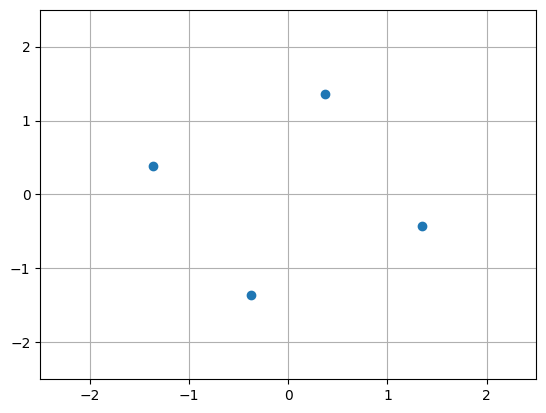

In [30]:
# ploting constellation diagram
import matplotlib.pyplot as plt
scatter_plot = scatter_plot.reshape(M,2,1)
plt.scatter(scatter_plot[:,0],scatter_plot[:,1])
plt.axis((-2.5,2.5,-2.5,2.5))
plt.grid()
plt.show()

In [31]:
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [32]:
# calculating BER
# this is optimized BER function so it can handle large number of N
# previous code has another for loop which was making it slow
EbNodB_range = list(frange(-4,8.5,0.5))
ber = [None]*len(EbNodB_range)
for n in range(0,len(EbNodB_range)):
    EbNo=10.0**(EbNodB_range[n]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))
    noise_mean = 0
    no_errors = 0
    nn = N
    noise = noise_std * np.random.randn(nn,n_channel)
    encoded_signal = encoder.predict(test_data) 
    final_signal = encoded_signal + noise
    pred_final_signal =  decoder.predict(final_signal)
    pred_output = np.argmax(pred_final_signal,axis=1)
    no_errors = (pred_output != test_label)
    no_errors =  no_errors.astype(int).sum()
    ber[n] = no_errors / nn 
    print ('SNR:',EbNodB_range[n],'BER:',ber[n])
    # use below line for generating matlab like matrix which can be copy and paste for plotting ber graph in matlab
    #print(ber[n], " ",end='')

1563/1563 [==============================] - 6s 4ms/step
SNR: -4 BER: 0.3428
1563/1563 [==============================] - 6s 4ms/step
SNR: -3.5 BER: 0.31716
1563/1563 [==============================] - 3s 2ms/step
SNR: -3.0 BER: 0.29538
1563/1563 [==============================] - 3s 2ms/step
SNR: -2.5 BER: 0.27354
1563/1563 [==============================] - 3s 2ms/step
SNR: -2.0 BER: 0.24832
1563/1563 [==============================] - 3s 2ms/step
SNR: -1.5 BER: 0.22522
1563/1563 [==============================] - 3s 2ms/step
SNR: -1.0 BER: 0.19926
1563/1563 [==============================] - 3s 2ms/step
SNR: -0.5 BER: 0.1729
1563/1563 [==============================] - 3s 2ms/step
SNR: 0.0 BER: 0.14984
1563/1563 [==============================] - 3s 2ms/step
SNR: 0.5 BER: 0.13382
1563/1563 [==============================] - 3s 2ms/step
SNR: 1.0 BER: 0.11134
1563/1563 [==============================] - 3s 2ms/step
SNR: 1.5 BER: 0.09238
1563/1563 [==============================] - 3s 

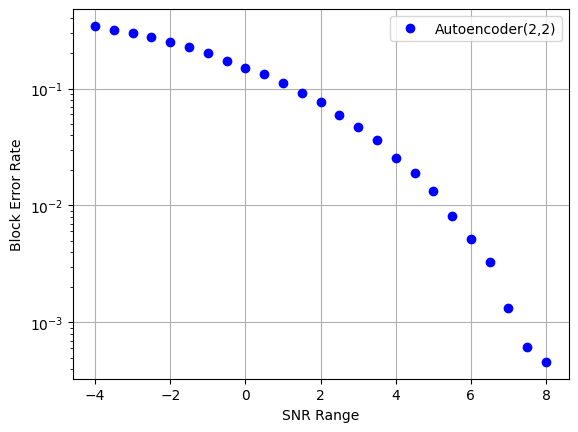

In [33]:
# ploting ber curve
import matplotlib.pyplot as plt
from scipy import interpolate
plt.plot(EbNodB_range, ber, 'bo',label='Autoencoder(2,2)')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)

In [34]:
# for saving figure remove below comment
plt.savefig('AutoEncoder_2_2_constrained_BER_matplotlib')
plt.show()

<Figure size 640x480 with 0 Axes>